In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from datetime import datetime
from dateutil.parser import parse
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from PIL import  Image
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
#from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
#from ggplot import *

In [2]:
#BENS_DATASCIENCES_20190901_20190930_NEW
df= pd.read_csv("FT_CHURN_PROFILE2.csv")
df2=df

In [3]:
#pd.qcut(df['CHURN_COUNT'], 4)
df['bins'] = np.where(df['CHURN_COUNT']>0, pd.qcut(df['CHURN_COUNT'], 4), 0)

In [4]:
df['bins2'] = np.where(df['CHURN_COUNT']<=28,4,5)
df['bins2'] = np.where(df['CHURN_COUNT']<=7,3,df['bins2'])
df['bins2'] = np.where(df['CHURN_COUNT']<=3,2,df['bins2'])
df['bins2'] = np.where(df['CHURN_COUNT']<=1,1,df['bins2'])
df['bins2'] = np.where(df['CHURN_COUNT']<1,0,df['bins2'])

df


,ACCOUNTNUMBER,GENDER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,CHURN_COUNT,DAYS_COUNT,bins,bins2
0,50928100037,unknown,-108.0,12,-108.0,59,51.416667,1,614400,43.100001,6,12,"(3.0, 7.0]",3
1,50928100157,unknown,-351.0,50,-450.0,188,415.366667,251,0,194.533339,12,39,"(7.0, 28.0]",4
2,50928100365,unknown,-54.0,10,-90.0,39,132.283333,2,195399600,28.266667,4,6,"(3.0, 7.0]",3
3,50928100784,unknown,-108.0,12,-108.0,41,19.483333,1,61021536,43.733336,2,12,"(1.0, 3.0]",2
4,50928101054,unknown,-66.0,8,-75.0,211,605.000000,90,347307424,145.600007,3,6,"(1.0, 3.0]",2
5,50928101351,unknown,-18.0,2,-18.0,6,1.350000,0,0,2.700001,2,2,"(1.0, 3.0]",2
6,50928101724,unknown,-63.0,7,-63.0,55,31.866667,0,179200,57.799999,6,6,"(3.0, 7.0]",3
7,50928101959,unknown,-18.0,2,-18.0,18,10.100000,4,972800,11.199999,2,2,"(1.0, 3.0]",2
8,50928103063,unknown,-36.0,4,-36.0,36,24.533333,0,159994384,5.320000,1,4,"(-0.001, 1.0]",1
9,50928103205,unknown,-171.0,25,-225.0,160,119.266667,42,0,242.266668,7,19,"(3.0, 7.0]",3


In [4]:
df2.head()

,ACCOUNTNUMBER,GENDER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,CHURN_COUNT,DAYS_COUNT,churn
0,50928100037,unknown,-108.0,12,-108.0,59,51.416667,1,614400,43.100001,6,12,1
1,50928100157,unknown,-351.0,50,-450.0,188,415.366667,251,0,194.533339,12,39,1
2,50928100365,unknown,-54.0,10,-90.0,39,132.283333,2,195399600,28.266667,4,6,1
3,50928100784,unknown,-108.0,12,-108.0,41,19.483333,1,61021536,43.733336,2,12,1
4,50928101054,unknown,-66.0,8,-75.0,211,605.000000,90,347307424,145.600007,3,6,1


In [5]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
#print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())


Rows     :  2103363
Columns  :  14

Missing values :   0

Unique values :  
 ACCOUNTNUMBER          2103363
GENDER                       4
PLAN_COST                 4868
TOTAL_PLAN_QTY            1304
TOTAL_PLAN_AMOUNT         7651
VOICE_CNT                 7911
VOICE_MINUTES_LOCAL     164050
SMS_CNT                   9872
TOTALOCTETSUNIT1       1762194
UNITS_MONEY             746912
CHURN_COUNT                 28
DAYS_COUNT                 343
bins                         5
bins2                        5
dtype: int64


In [6]:

df.columns
df.head()

,ACCOUNTNUMBER,GENDER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,CHURN_COUNT,DAYS_COUNT,churn
0,50928100037,unknown,-108.0,12,-108.0,59,51.416667,1,614400,43.100001,6,12,1
1,50928100157,unknown,-351.0,50,-450.0,188,415.366667,251,0,194.533339,12,39,1
2,50928100365,unknown,-54.0,10,-90.0,39,132.283333,2,195399600,28.266667,4,6,1
3,50928100784,unknown,-108.0,12,-108.0,41,19.483333,1,61021536,43.733336,2,12,1
4,50928101054,unknown,-66.0,8,-75.0,211,605.000000,90,347307424,145.600007,3,6,1


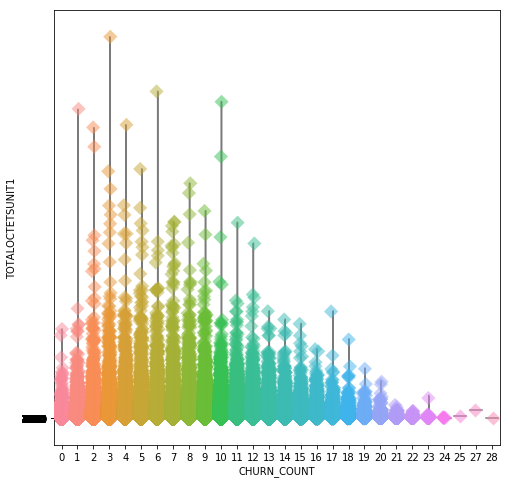

In [7]:

plt.subplots(figsize=(8,8))

g = sns.violinplot(x="CHURN_COUNT", y="TOTALOCTETSUNIT1", data=df, inner=None,color="0.8")
g = sns.stripplot(x="CHURN_COUNT", y="TOTALOCTETSUNIT1", data=df, jitter=True, marker="D", size=10, alpha=0.5,edgecolor="gray")

g.set_yticks(np.arange(0,4481,20))
g

In [8]:
df.corr(method="pearson")

,ACCOUNTNUMBER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,CHURN_COUNT,DAYS_COUNT,churn
ACCOUNTNUMBER,1.000000,0.026353,-0.026582,0.024865,-0.024081,-0.008191,0.042505,0.002022,-0.037115,0.007567,-0.028738,0.003009
PLAN_COST,0.026353,1.000000,-0.938169,0.950119,-0.615634,-0.482582,-0.227696,-0.461090,-0.481469,-0.356618,-0.982794,-0.029613
TOTAL_PLAN_QTY,-0.026582,-0.938169,1.000000,-0.992024,0.603669,0.462476,0.207765,0.454385,0.486879,0.311387,0.935818,0.025179
TOTAL_PLAN_AMOUNT,0.024865,0.950119,-0.992024,1.000000,-0.596321,-0.455946,-0.209432,-0.478035,-0.476694,-0.312475,-0.931024,-0.024767
VOICE_CNT,-0.024081,-0.615634,0.603669,-0.596321,1.000000,0.710351,0.220618,0.286454,0.553925,0.215436,0.613960,0.016308
VOICE_MINUTES_LOCAL,-0.008191,-0.482582,0.462476,-0.455946,0.710351,1.000000,0.266434,0.265404,0.412172,0.211250,0.482334,0.016086
SMS_CNT,0.042505,-0.227696,0.207765,-0.209432,0.220618,0.266434,1.000000,0.156956,0.061118,0.186082,0.224830,0.015534
TOTALOCTETSUNIT1,0.002022,-0.461090,0.454385,-0.478035,0.286454,0.265404,0.156956,1.000000,0.205005,0.183481,0.408318,0.011103
UNITS_MONEY,-0.037115,-0.481469,0.486879,-0.476694,0.553925,0.412172,0.061118,0.205005,1.000000,0.076697,0.470639,-0.000689
CHURN_COUNT,0.007567,-0.356618,0.311387,-0.312475,0.215436,0.211250,0.186082,0.183481,0.076697,1.000000,0.373374,0.131418


In [6]:
df['Churn'] = np.where(df['CHURN_COUNT'] > 0, 1, 0)
#df['bins'] = np.where(df['CHURN_COUNT']>0, pd.qcut(df['CHURN_COUNT'], 4), 0)

#Separating churn and non churn customers
churn     = df[df["Churn"] == 1]
not_churn = df[df["Churn"] == 0]

#Separating catagorical and numerical columns
Id_col     = ['ACCOUNTNUMBER']
target_col = ["CHURN_COUNT"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
telcom=df

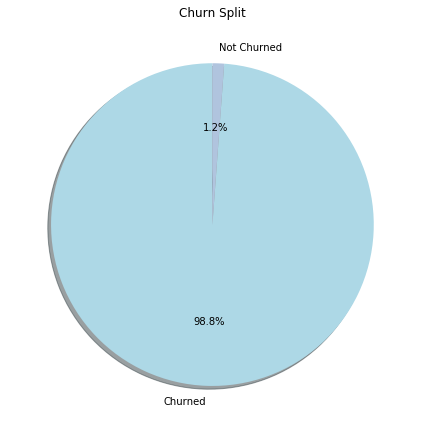

In [7]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*Counter(df["churn"]).items())
colors = ['lightblue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

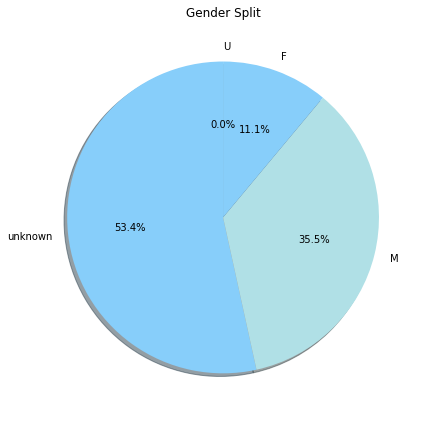

In [10]:
labels, values = zip(*Counter(df["GENDER"]).items())
colors = ['lightskyblue', 'powderblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

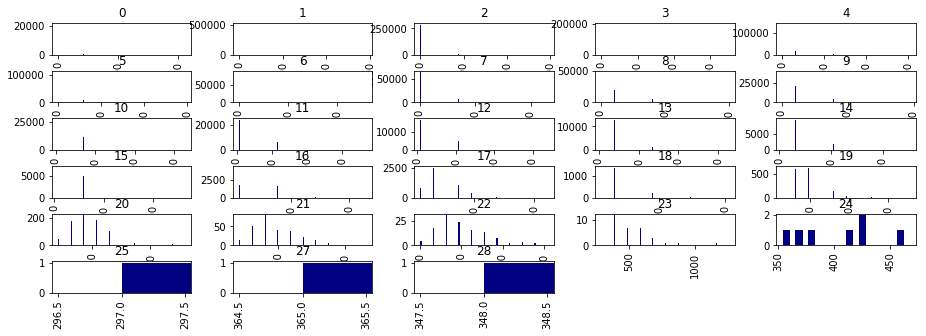

In [48]:
fig=df['PLAN_COST'].hist(by=df['CHURN_COUNT'],figsize=(15,5),width=6.5, color='navy' )
plt.show()

In [10]:

telcomdata = df2.apply(LabelEncoder().fit_transform)
telcomdata = telcomdata.drop('ACCOUNTNUMBER',axis=1)
telcomdata.head(8)

TypeError: ('unorderable types: Interval() > int()', 'occurred at index bins')

In [15]:
telcomdata.corr(method="pearson")

,ACCOUNTNUMBER,GENDER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,CHURN_COUNT,DAYS_COUNT,churn
ACCOUNTNUMBER,1.000000,-0.132841,0.036524,-0.030186,0.031145,-0.027072,-0.005674,0.053309,0.005569,-0.065824,0.013552,-0.036726,0.007179
GENDER,-0.132841,1.000000,-0.069050,0.052775,-0.054997,0.042785,0.023549,-0.058399,0.007654,0.091548,0.012565,0.068739,0.014745
PLAN_COST,0.036524,-0.069050,1.000000,-0.883739,0.914777,-0.538917,-0.456023,-0.159888,-0.737724,-0.674335,-0.114171,-0.980720,0.062746
TOTAL_PLAN_QTY,-0.030186,0.052775,-0.883739,1.000000,-0.988965,0.493496,0.402057,0.140226,0.697847,0.618732,0.096250,0.869754,-0.056621
TOTAL_PLAN_AMOUNT,0.031145,-0.054997,0.914777,-0.988965,1.000000,-0.504098,-0.413118,-0.144642,-0.719930,-0.635896,-0.098590,-0.895009,0.059948
VOICE_CNT,-0.027072,0.042785,-0.538917,0.493496,-0.504098,1.000000,0.678916,0.174511,0.395624,0.516874,0.057238,0.521670,-0.034314
VOICE_MINUTES_LOCAL,-0.005674,0.023549,-0.456023,0.402057,-0.413118,0.678916,1.000000,0.250138,0.371130,0.450364,0.077139,0.444852,-0.028542
SMS_CNT,0.053309,-0.058399,-0.159888,0.140226,-0.144642,0.174511,0.250138,1.000000,0.171680,0.095696,0.055036,0.158680,-0.011469
TOTALOCTETSUNIT1,0.005569,0.007654,-0.737724,0.697847,-0.719930,0.395624,0.371130,0.171680,1.000000,0.495033,0.216374,0.741796,-0.061812
UNITS_MONEY,-0.065824,0.091548,-0.674335,0.618732,-0.635896,0.516874,0.450364,0.095696,0.495033,1.000000,0.095870,0.672750,-0.058756


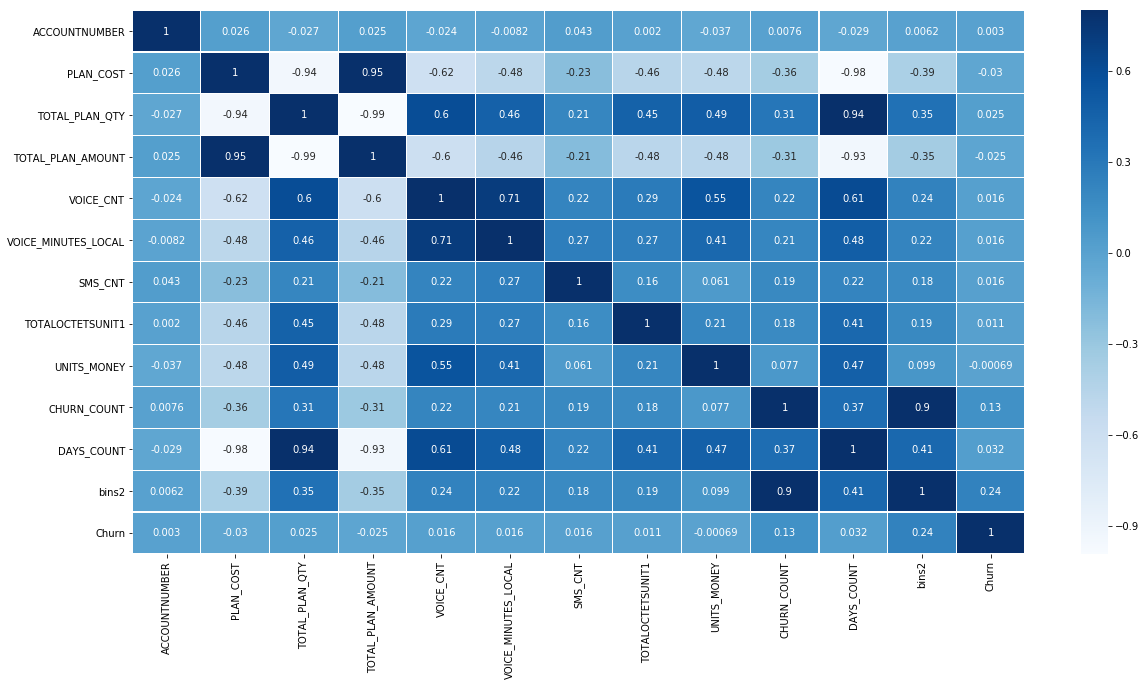

In [9]:

# Correlation Plot
corrmat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
colormap = plt.cm.Blues
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

In [44]:

#Splitting the data into features & target
telcomdata=df
X = telcomdata.loc[:, telcomdata.columns != 'CHURN_COUNT']
X=X.loc[:, X.columns != 'churn']
X=X.loc[:, X.columns != 'GENDER']
X=X.loc[:, X.columns != 'bins']
X=X.loc[:, X.columns != 'bins']
y = telcomdata[["bins2"]]


In [43]:
X.head()

,ACCOUNTNUMBER,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,DAYS_COUNT,bins,bins2,Churn
0,50928100037,108.0,12.0,108.0,59.0,51.416667,1.0,614400.0,43.100001,12.0,"(3.0, 7.0]",3,1
1,50928100157,351.0,50.0,450.0,188.0,415.366667,251.0,0.0,194.533339,39.0,"(7.0, 28.0]",4,1
2,50928100365,54.0,10.0,90.0,39.0,132.283333,2.0,195399600.0,28.266667,6.0,"(3.0, 7.0]",3,1
3,50928100784,108.0,12.0,108.0,41.0,19.483333,1.0,61021536.0,43.733336,12.0,"(1.0, 3.0]",2,1
4,50928101054,66.0,8.0,75.0,211.0,605.000000,90.0,347307424.0,145.600007,6.0,"(1.0, 3.0]",2,1


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)
#scaling the data

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [46]:
X_train_std.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train_std,y_train)
importances = rfc.feature_importances_

f_importances = pd.Series(importances, telcomdata.columns[:-2])
f_importances.sort_values(ascending=False, inplace=True)
f_importances


Optimal number of features : 1


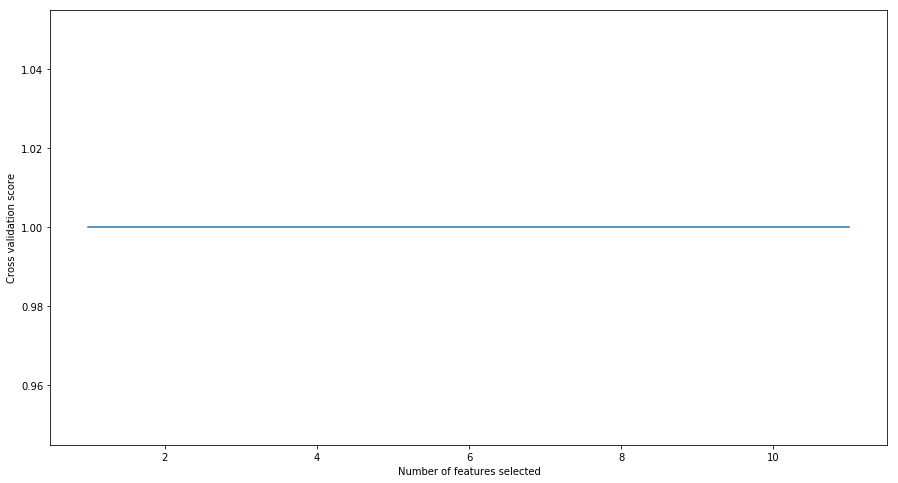

In [20]:
lr = LogisticRegression(penalty="l1",C=.1,random_state=0)

selector = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
selector.fit(X_train_std, y_train)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [ ]:
selector.grid_scores_

In [ ]:
X.head()


In [ ]:
y.head()

In [ ]:
X_train_std

In [ ]:
X_test_std

In [ ]:
print("\nX taining :",len(X_train),"\nY training",len(y_train),"\nX test",len(X_test),"\nY test",len(y_test))

In [52]:
Id_col     = ['ACCOUNTNUMBER']
target_col = ["CHURN"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

In [53]:
print("\nPrimary key: ",Id_col)
print("\ncategorical columns: \n",cat_cols)
print("\nnumerical columns: \n",num_cols)
print("\nTarget column: ",target_col)


Primary key:  ['ACCOUNTNUMBER']

categorical columns: 
 ['DATE_CODE', 'GENDER', 'CUSTOMER_TYPE', 'DEPARTMENT', 'X_COORDINATE', 'Y_COORDINATE']

numerical columns: 
 ['PLAN_COST', 'TOTAL_PLAN_QTY', 'TOTAL_PLAN_AMOUNT', 'VOICE_CNT', 'VOICE_MINUTES_LOCAL', 'VOICE_MINUTES_INTL', 'SMS_CNT', 'TOTALOCTETSUNIT1', 'UNITS_MONEY']

Target column:  ['CHURN']


In [54]:
churn     = df[df["churn"] == 1]
not_churn = df[df["churn"] == 0]

In [18]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "TOTALOCTETSUNIT1",
                                       values = df["TOTALOCTETSUNIT1"]),
                                  dict(label  = 'VOICE_MINUTES_LOCAL',
                                       values = df['VOICE_MINUTES_LOCAL']),
                                  dict(label  = 'UNITS_MONEY',
                                       values = df['UNITS_MONEY'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer churn",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)



TypeError: Object of type Interval is not JSON serializable

In [19]:
scatter_matrix(df)

In [25]:
df[num_cols]=abs(df[num_cols])
df[num_cols].head()

,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,DAYS_COUNT
0,108.0,12.0,108.0,59.0,51.416667,1.0,614400.0,43.100001,12.0
1,351.0,50.0,450.0,188.0,415.366667,251.0,0.0,194.533339,39.0
2,54.0,10.0,90.0,39.0,132.283333,2.0,195399600.0,28.266667,6.0
3,108.0,12.0,108.0,41.0,19.483333,1.0,61021536.0,43.733336,12.0
4,66.0,8.0,75.0,211.0,605.000000,90.0,347307424.0,145.600007,6.0


In [26]:
num_cols

['PLAN_COST',
 'TOTAL_PLAN_QTY',
 'TOTAL_PLAN_AMOUNT',
 'VOICE_CNT',
 'VOICE_MINUTES_LOCAL',
 'SMS_CNT',
 'TOTALOCTETSUNIT1',
 'UNITS_MONEY',
 'DAYS_COUNT']

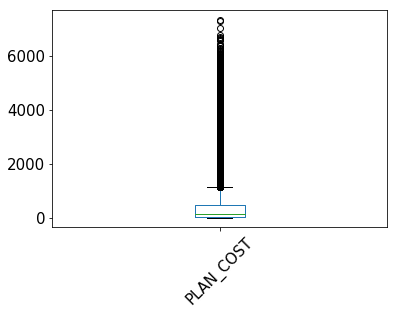

In [31]:
boxplot = df.boxplot(column=['PLAN_COST'
 ],grid=False, rot=45, fontsize=15)

In [34]:
df[num_cols].describe()

,PLAN_COST,TOTAL_PLAN_QTY,TOTAL_PLAN_AMOUNT,VOICE_CNT,VOICE_MINUTES_LOCAL,SMS_CNT,TOTALOCTETSUNIT1,UNITS_MONEY,DAYS_COUNT
count,2.103363e+06,2.103363e+06,2.103363e+06,2.103363e+06,2.103363e+06,2.103363e+06,2.103363e+06,2.103363e+06,2.103363e+06
mean,3.793002e+02,4.836031e+01,4.582598e+02,2.320558e+02,3.248433e+02,1.777690e+02,6.501502e+09,2.725446e+02,3.747855e+01
std,5.707145e+02,8.011954e+01,7.547873e+02,5.736347e+02,9.199824e+02,7.297612e+02,2.218563e+10,1.135916e+03,5.507834e+01
min,2.500000e-01,1.000000e+00,2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+01,4.000000e+00,3.600000e+01,1.200000e+01,8.866667e+00,0.000000e+00,7.338488e+07,8.500000e+00,3.000000e+00
50%,1.350000e+02,1.600000e+01,1.530000e+02,5.300000e+01,5.798333e+01,5.000000e+00,1.091850e+09,4.269500e+01,1.400000e+01
75%,4.770000e+02,5.800000e+01,5.510000e+02,2.090000e+02,2.611667e+02,6.300000e+01,5.474115e+09,1.748850e+02,4.800000e+01
max,7.319000e+03,4.427000e+03,3.983800e+04,3.375400e+04,8.578860e+04,8.148400e+04,2.897340e+12,1.325444e+05,3.430000e+02


In [ ]:
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHURN", y="VOICE_MINUTES_LOCAL", data=df)

In [40]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(random_state=0)

dtc.fit(X_train_std,y_train)

y_pred_dtc = dtc.predict(X_test_std)

train_acc_dtc = round((dtc.score(X_train_std, y_train))*100,1)
test_acc_dtc = round((dtc.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_dtc)
print('Test accuracy: %s %%' % test_acc_dtc)

Training accuracy: 99.5 %
Test accuracy: 88.9 %


In [41]:
preds = dtc.predict_proba(X_test_std)[:,1]

fpr_dtc, tpr_dtc, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_dtc,tpr=tpr_dtc))

auc_dtc = round(metrics.auc(fpr_dtc,tpr_dtc),2)
print(auc_dtc)

0.54


In [43]:

X_arr = X.values
y_arr = y.values.flatten()

predicted = cross_val_score(tree.DecisionTreeClassifier(), X_arr, y_arr, cv=10)

dtc_cv_score = round(np.mean(predicted)*100,1)

print("Decision Tree Classifier score after using Cross Validation (k=10) is : %s %%" % dtc_cv_score)

Decision Tree Classifier score after using Cross Validation (k=10) is : 89.2 %


              precision    recall  f1-score   support

           0       0.94      0.94      0.94    117537
           1       0.09      0.10      0.09      7413

   micro avg       0.89      0.89      0.89    124950
   macro avg       0.52      0.52      0.52    124950
weighted avg       0.89      0.89      0.89    124950



Text(0.5, 1.0, 'Decision Tree Classifier')

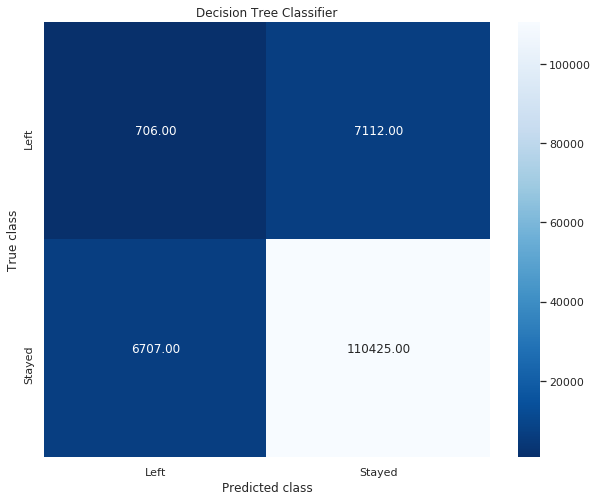

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

##Confusion matrix

dtc_cm = metrics.confusion_matrix(y_pred_dtc, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(dtc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"],cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree Classifier')

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_std,y_train)

y_pred_knn = knn.predict(X_test_std)

train_acc_knn = round((knn.score(X_train_std, y_train))*100,1)
test_acc_knn = round((knn.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_knn)
print('Test accuracy: %s %%' % test_acc_knn)

Training accuracy: 94.5 %
Test accuracy: 93.0 %


In [49]:
preds = knn.predict_proba(X_test_std)[:,1]

fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_knn,tpr=tpr_knn))

auc_knn = round(metrics.auc(fpr_knn,tpr_knn),2)
print(auc_knn)

0.55


In [63]:

for m in num_cols:
    df[m]=pd.to_numeric(df[m])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 
train,test = train_test_split(df,test_size = .25 ,random_state = 111)

In [14]:
##seperating dependent and independent variables
cols    = [i for i in df.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model

NameError: name 'train' is not defined

In [15]:
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [67]:
train_X.columns

Index(['DATE_CODE', 'GENDER', 'CUSTOMER_TYPE', 'DEPARTMENT', 'X_COORDINATE',
       'Y_COORDINATE', 'PLAN_COST', 'TOTAL_PLAN_QTY', 'TOTAL_PLAN_AMOUNT',
       'VOICE_CNT', 'VOICE_MINUTES_LOCAL', 'VOICE_MINUTES_INTL', 'SMS_CNT',
       'TOTALOCTETSUNIT1', 'UNITS_MONEY'],
      dtype='object')

In [68]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,cols,"coefficients",threshold_plot = True)

ValueError: could not convert string to float: 'unknown'